#  The Sparks Foundation | @ GRIPNovember 2022

 TASK 3 - Exploratory Data Analysis - Retail (Sample Superstore)---Naseem

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

INPUT DATA

In [2]:
import os
os.getcwd()
os.chdir("D:\\SPARKS PROJECTS") # change directory

EXPLORING THE DATA

In [3]:
store = pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
store.shape

(9994, 13)

In [8]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


DATA CLEANING

In [9]:
store.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [10]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
store.median()

Postal Code    56430.5000
Sales             54.4900
Quantity           3.0000
Discount           0.2000
Profit             8.6665
dtype: float64

In [12]:
store.duplicated().sum()

17

In [13]:
# Finding duplicates in the data

store[store.duplicated()==True]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [14]:
# Removing the duplicates in the data

store.drop_duplicates(inplace=True)

In [15]:
store.duplicated().sum()

0

In [16]:
store.shape

(9977, 13)

In [17]:
store.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
store.skew(axis=0)

Postal Code    -0.127166
Sales          12.963770
Quantity        1.276709
Discount        1.683386
Profit          7.554748
dtype: float64

In [19]:
store_n = store.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(store_n.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  5


In [20]:
store_cat = store.select_dtypes(include = ['object'])
lstcatcolumns = list(store_cat.columns.values)
print("Categorical Column = " ,lstcatcolumns)

Categorical Column =  ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [21]:
# Univariate analysis of Numerical Data

Text(0.5, 1.0, 'Profit')

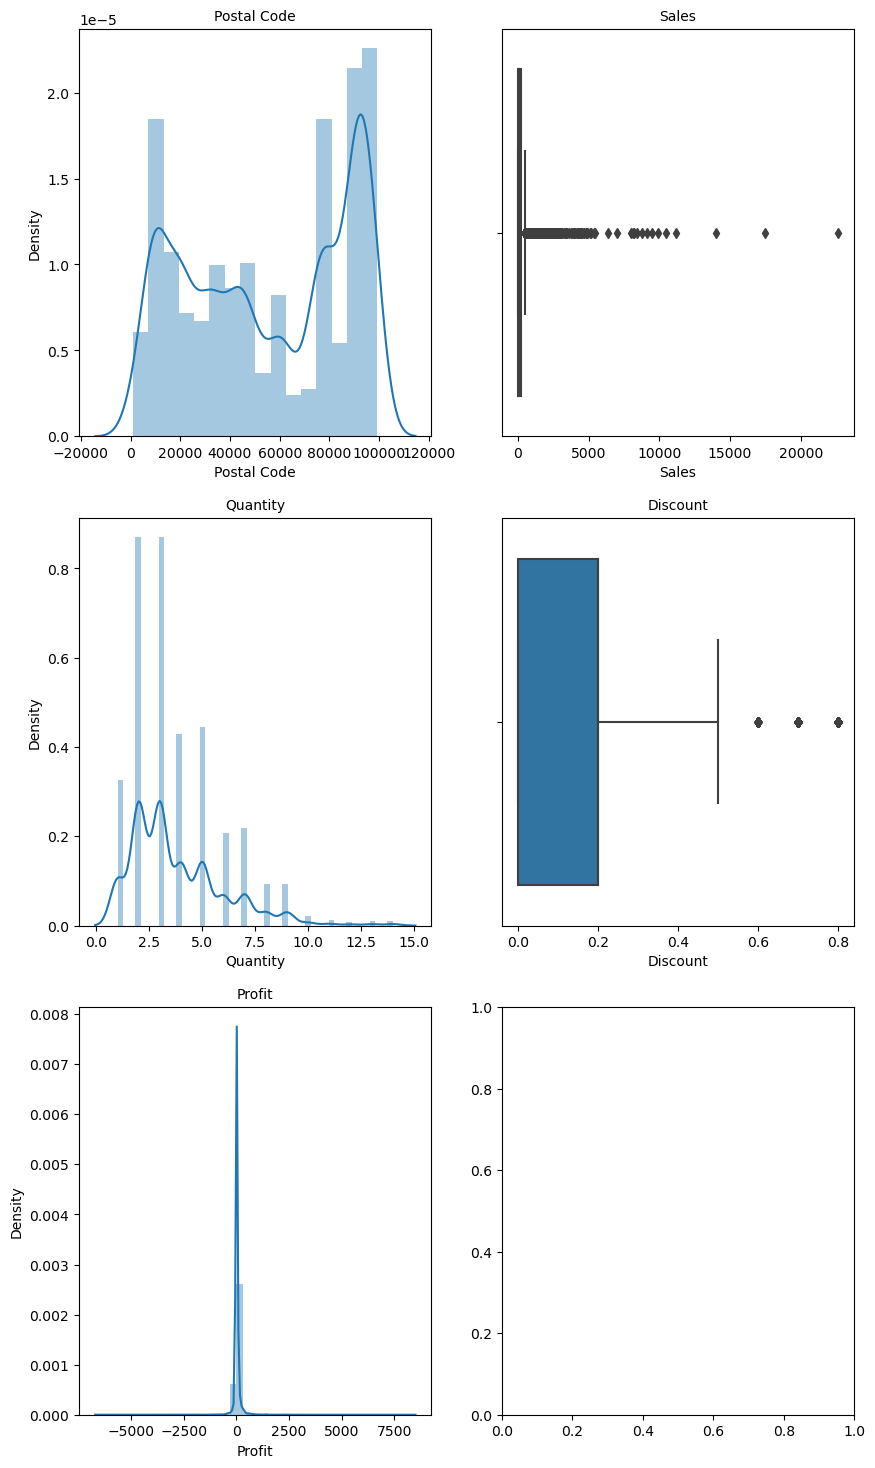

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(store_n['Postal Code'] , ax=axes[0][0])
a.set_title("Postal Code",fontsize=10)

a = sns.boxplot(store_n['Sales'] , orient = "v" , ax=axes[0][1])
a.set_title("Sales",fontsize=10)

a = sns.distplot(store_n['Quantity'] , ax=axes[1][0])
a.set_title("Quantity",fontsize=10)

a = sns.boxplot(store_n['Discount'] , orient = "v" , ax=axes[1][1])
a.set_title("Discount",fontsize=10)

a = sns.distplot(store_n['Profit'] , ax=axes[2][0])
a.set_title("Profit",fontsize=10)

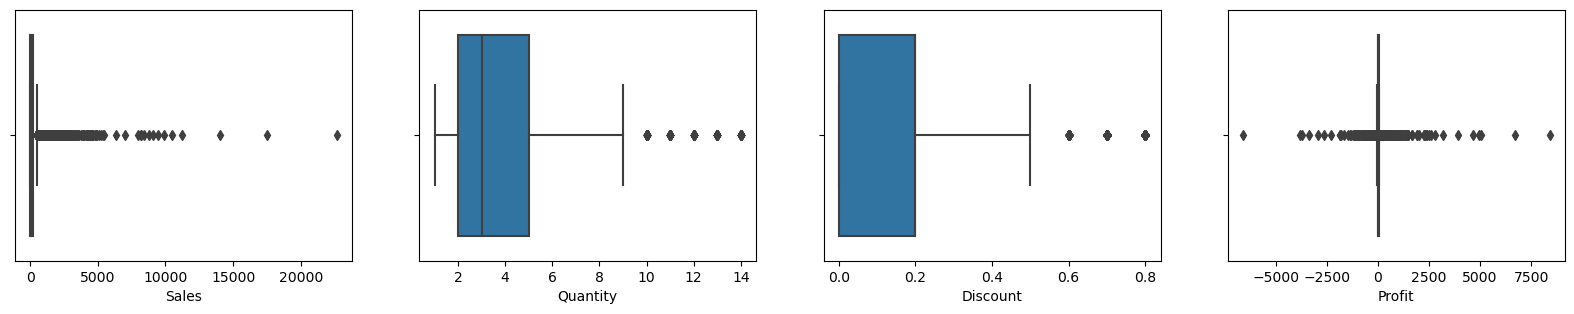

In [23]:
# to check outliers

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(store['Sales']);

plt.subplot(4,4,2)
sns.boxplot(store['Quantity']);

plt.subplot(4,4,3)
sns.boxplot(store['Discount']);

plt.subplot(4,4,4)
sns.boxplot(store['Profit']);

In [67]:
no_outlier =[]

def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    
     #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [68]:
outlier_list = [x for x in store_n.columns if x not in no_outlier]

for i in store_n[outlier_list]:    
    store_n[i]=treat_outlier(store_n[i])

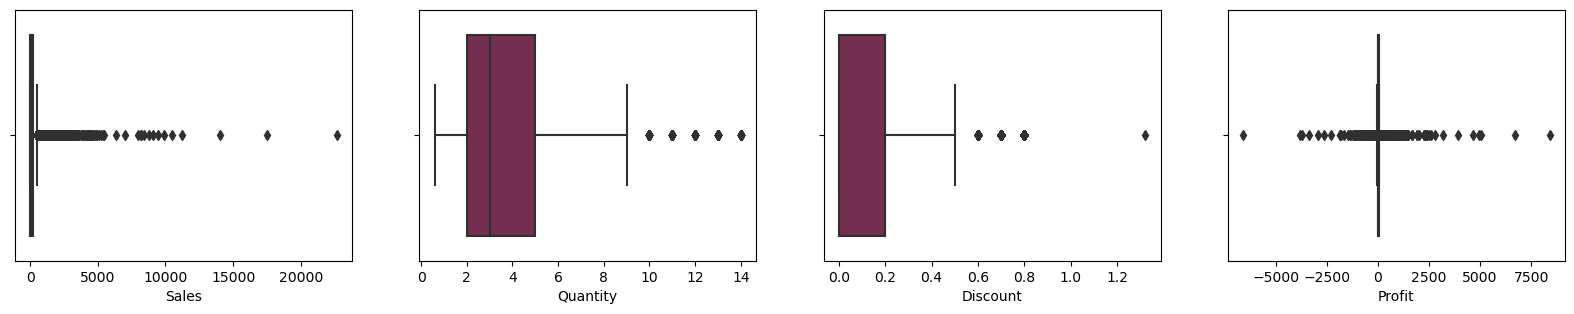

In [69]:
# removing or clipping outliers

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(store['Sales']);

plt.subplot(4,4,2)
sns.boxplot(store['Quantity']);

plt.subplot(4,4,3)
sns.boxplot(store['Discount']);

plt.subplot(4,4,4)
sns.boxplot(store['Profit']);

In [26]:
for column in store.columns:
    if store[column].dtype == 'object':
        print(column.upper(),': ',store[column].nunique())
        print(store[column].value_counts().sort_values())
        print('\n')

SHIP MODE :  4
Same Day           542
First Class       1537
Second Class      1943
Standard Class    5955
Name: Ship Mode, dtype: int64


SEGMENT :  3
Home Office    1779
Corporate      3015
Consumer       5183
Name: Segment, dtype: int64


COUNTRY :  1
United States    9977
Name: Country, dtype: int64


CITY :  531
Manhattan              1
San Luis Obispo        1
Champaign              1
Baytown                1
Arlington Heights      1
                    ... 
Seattle              424
San Francisco        506
Philadelphia         536
Los Angeles          746
New York City        914
Name: City, Length: 531, dtype: int64


STATE :  49
Wyoming                    1
West Virginia              4
North Dakota               7
Maine                      8
District of Columbia      10
Vermont                   11
South Dakota              12
Montana                   15
Idaho                     21
Kansas                    24
New Hampshire             27
Iowa                      30
New Me

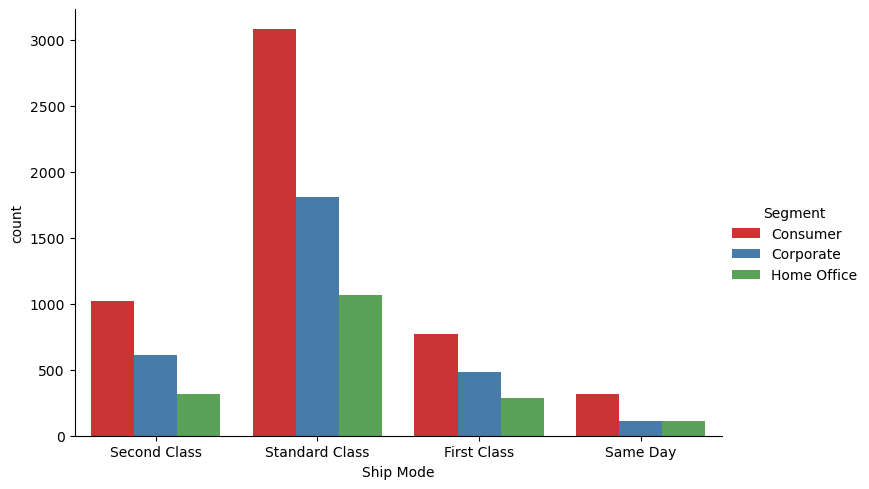

In [27]:
### Univariate analysis of Categorical Variables
sns.catplot('Ship Mode',hue='Segment',data=store,kind = 'count',aspect = 1.5, palette = 'Set1');

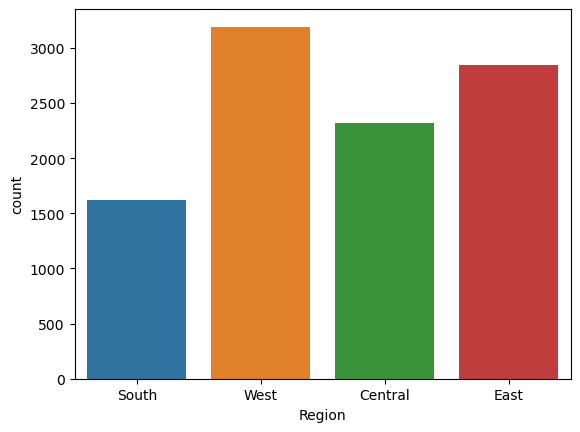

In [28]:
sns.countplot(x ='Region', data =store);

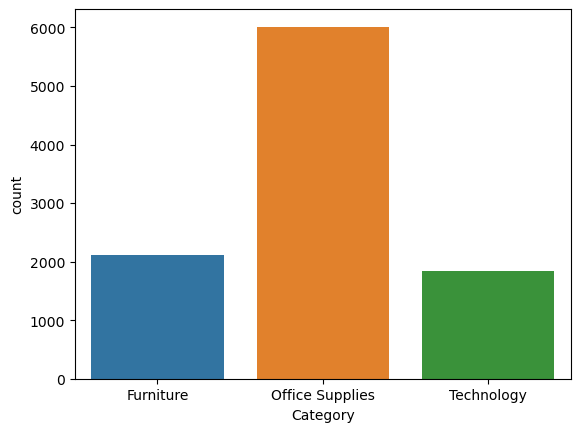

In [29]:
sns.countplot(x ='Category', data =store);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Philadelphia'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'San Diego'),
  Text(9, 0, 'Springfield'),
  Text(10, 0, 'Dallas'),
  Text(11, 0, 'Jacksonville'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'Newark'),
  Text(14, 0, 'Richmond'),
  Text(15, 0, 'Jackson'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Aurora'),
  Text(18, 0, 'Phoenix'),
  Text(19, 0, 'Long Beach'),
  Text(20, 0, 'Arlington'),
  Text(21, 0, 'San Antonio'),
  Text(22, 0, 'Miami'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'Rochester'),
  Text(25, 0, 'Charlotte'),
  Text(26, 0, 'Henderson'),
  Text(27, 0, 'Lakewood'),
  Text(

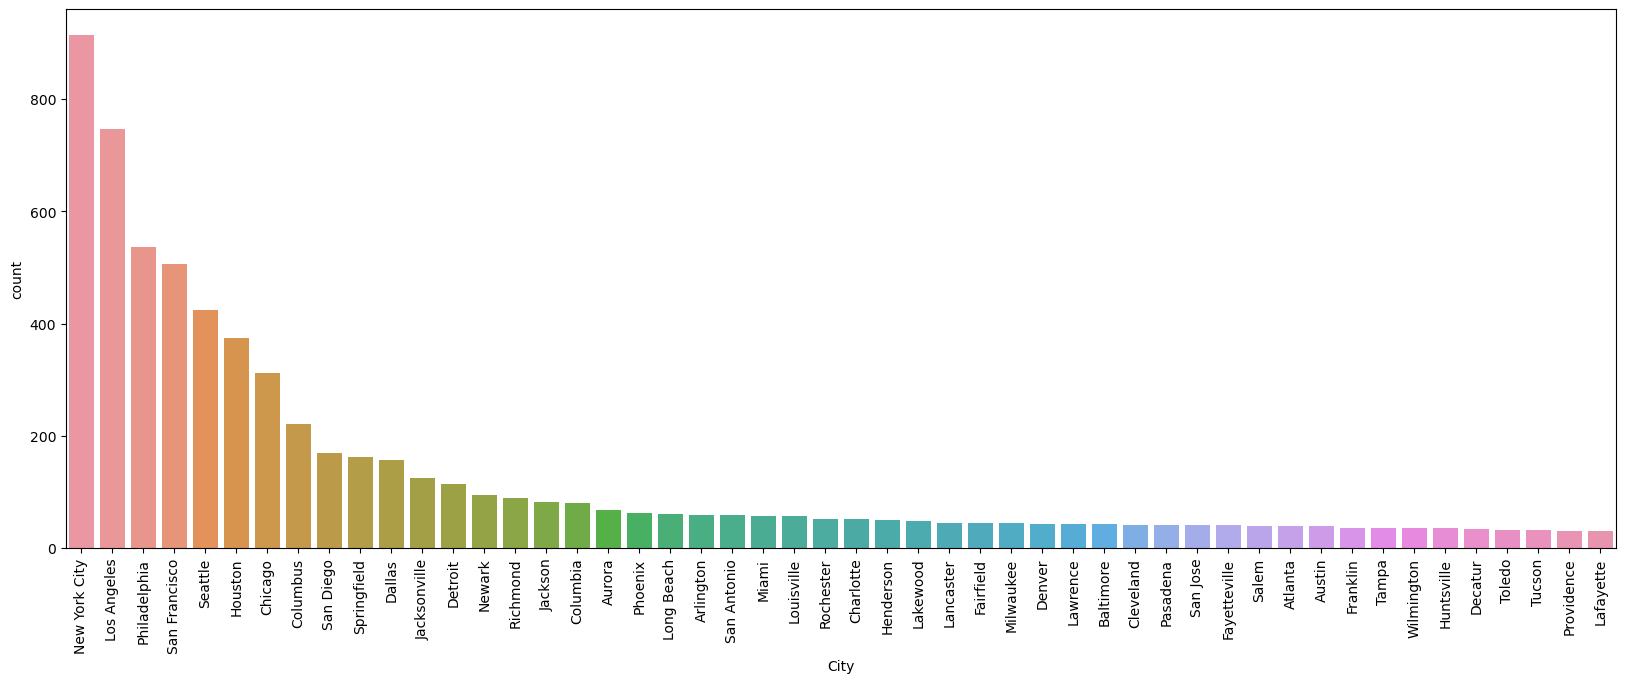

In [30]:
plt.figure(figsize=(20,7))
sns.countplot(x =store['City'],order=(store['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

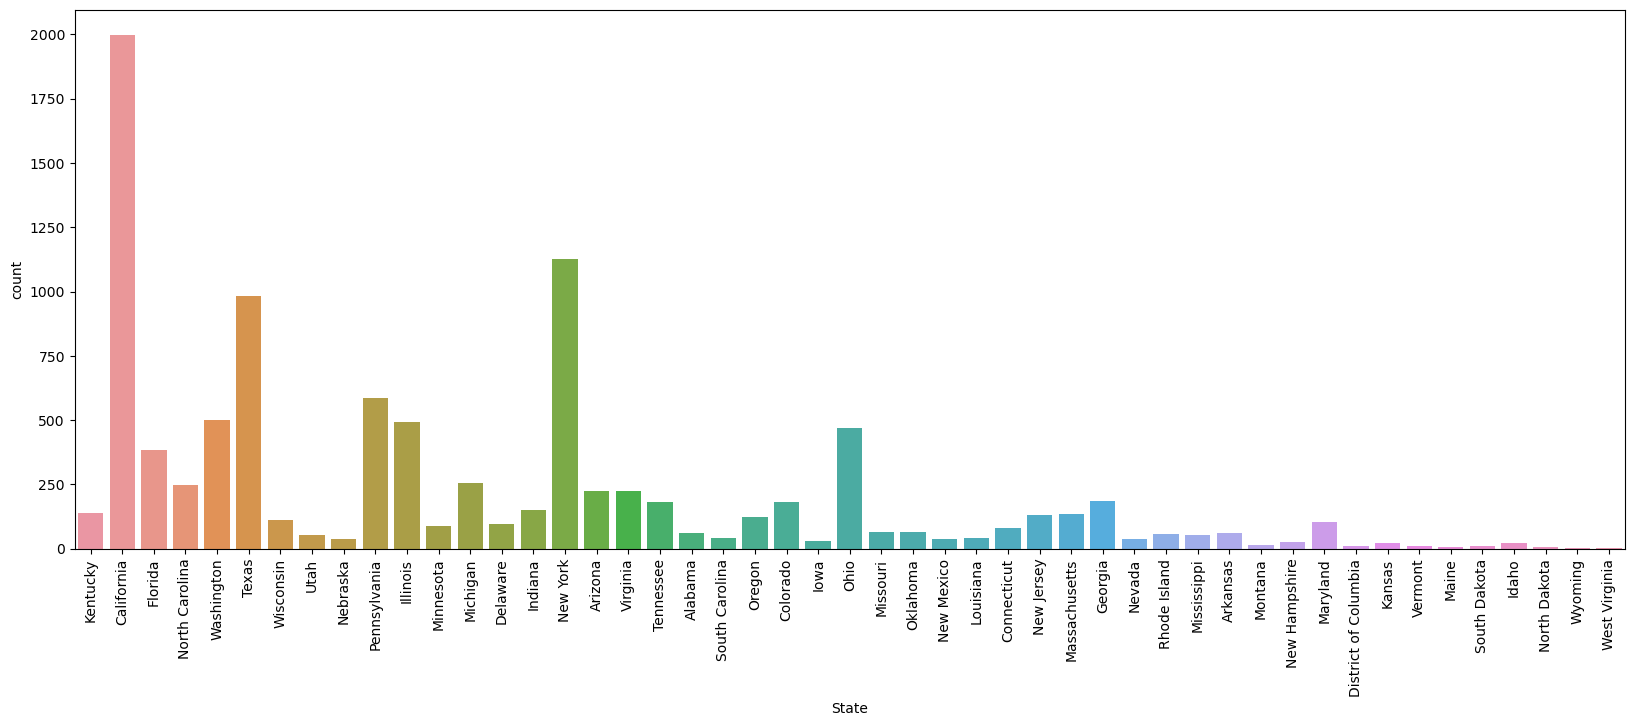

In [31]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(x ='State', data =store);

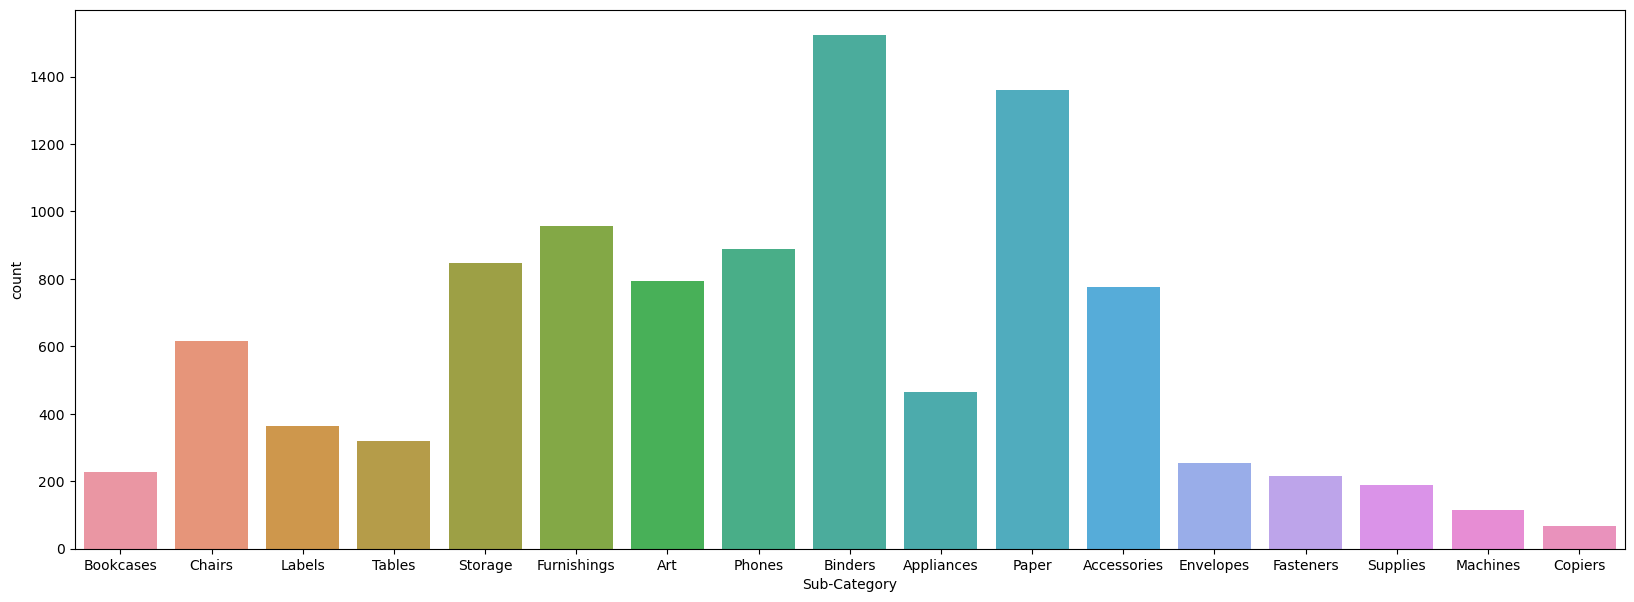

In [32]:
plt.figure(figsize=(20,7))
sns.countplot(x ='Sub-Category', data =store);

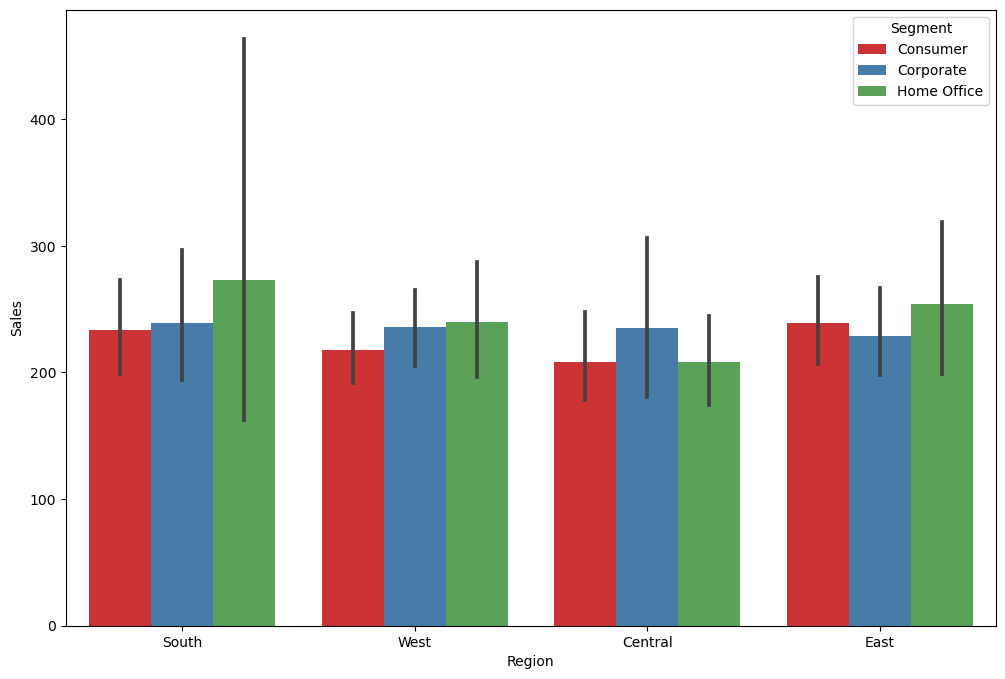

In [33]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x='Region', y='Sales',hue='Segment',data= store,palette='Set1')

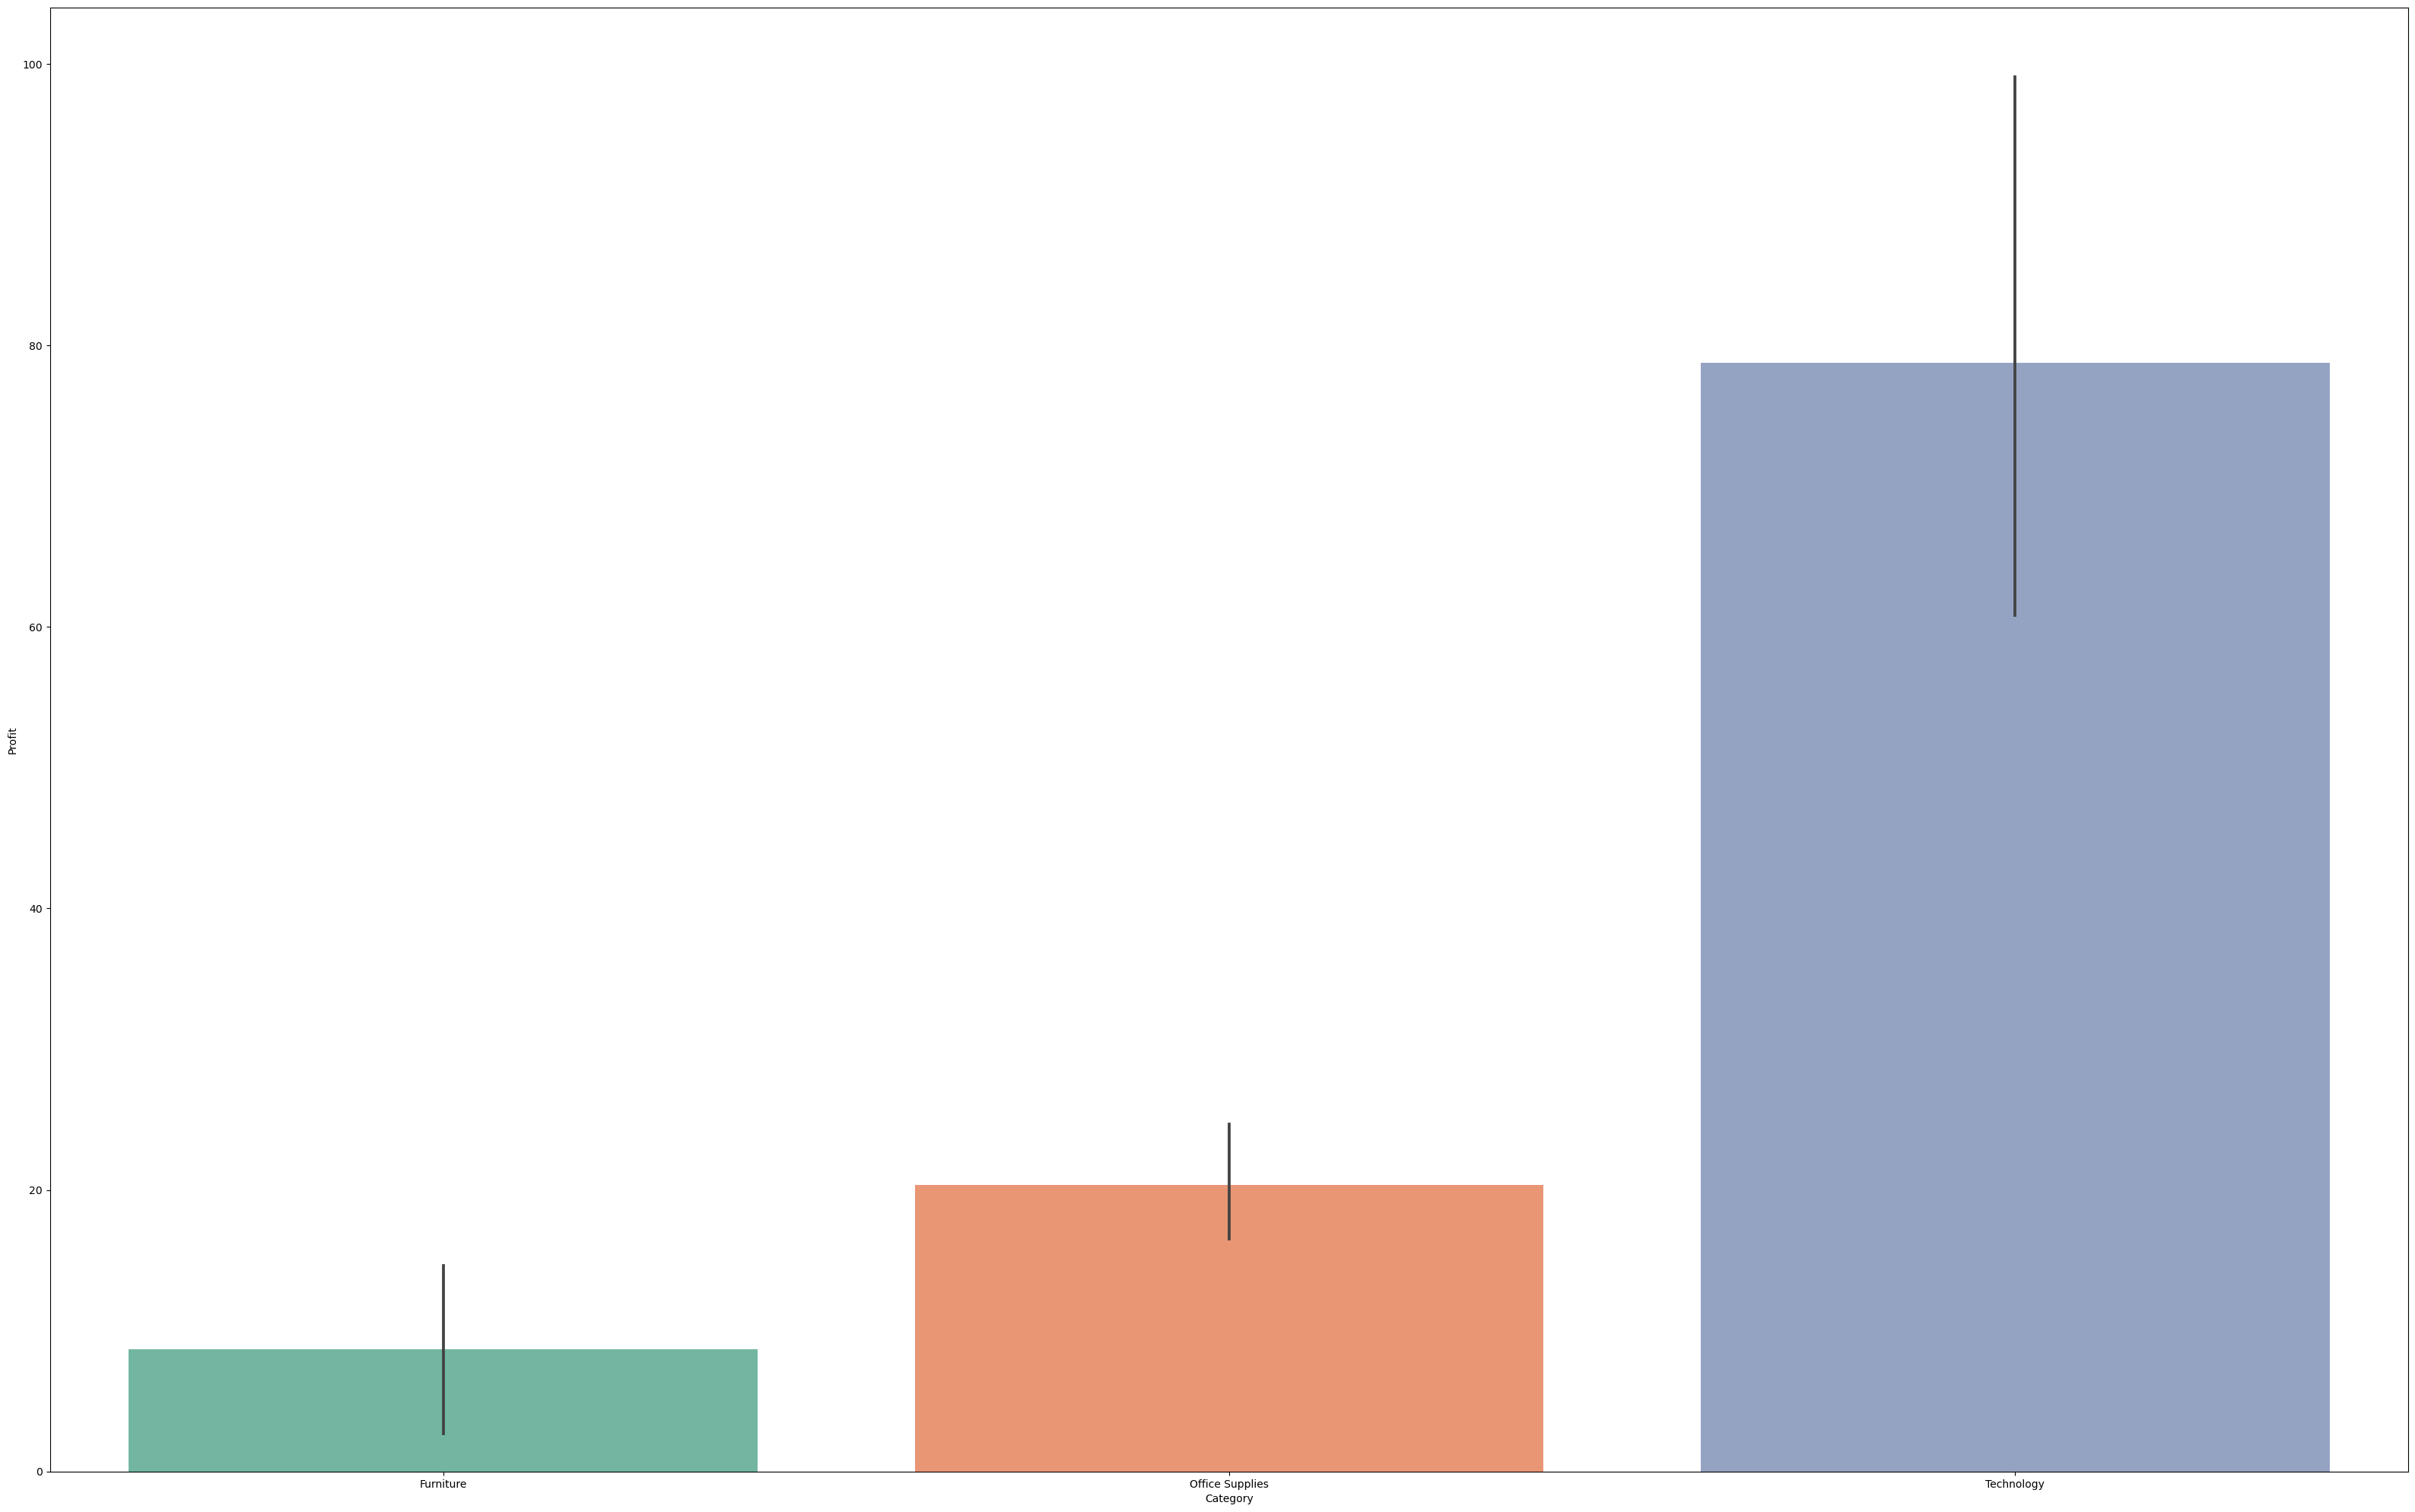

In [34]:
plt.figure(figsize=(40,25))
sns.barplot(x='Category', y='Profit',data = store,palette = 'Set2');

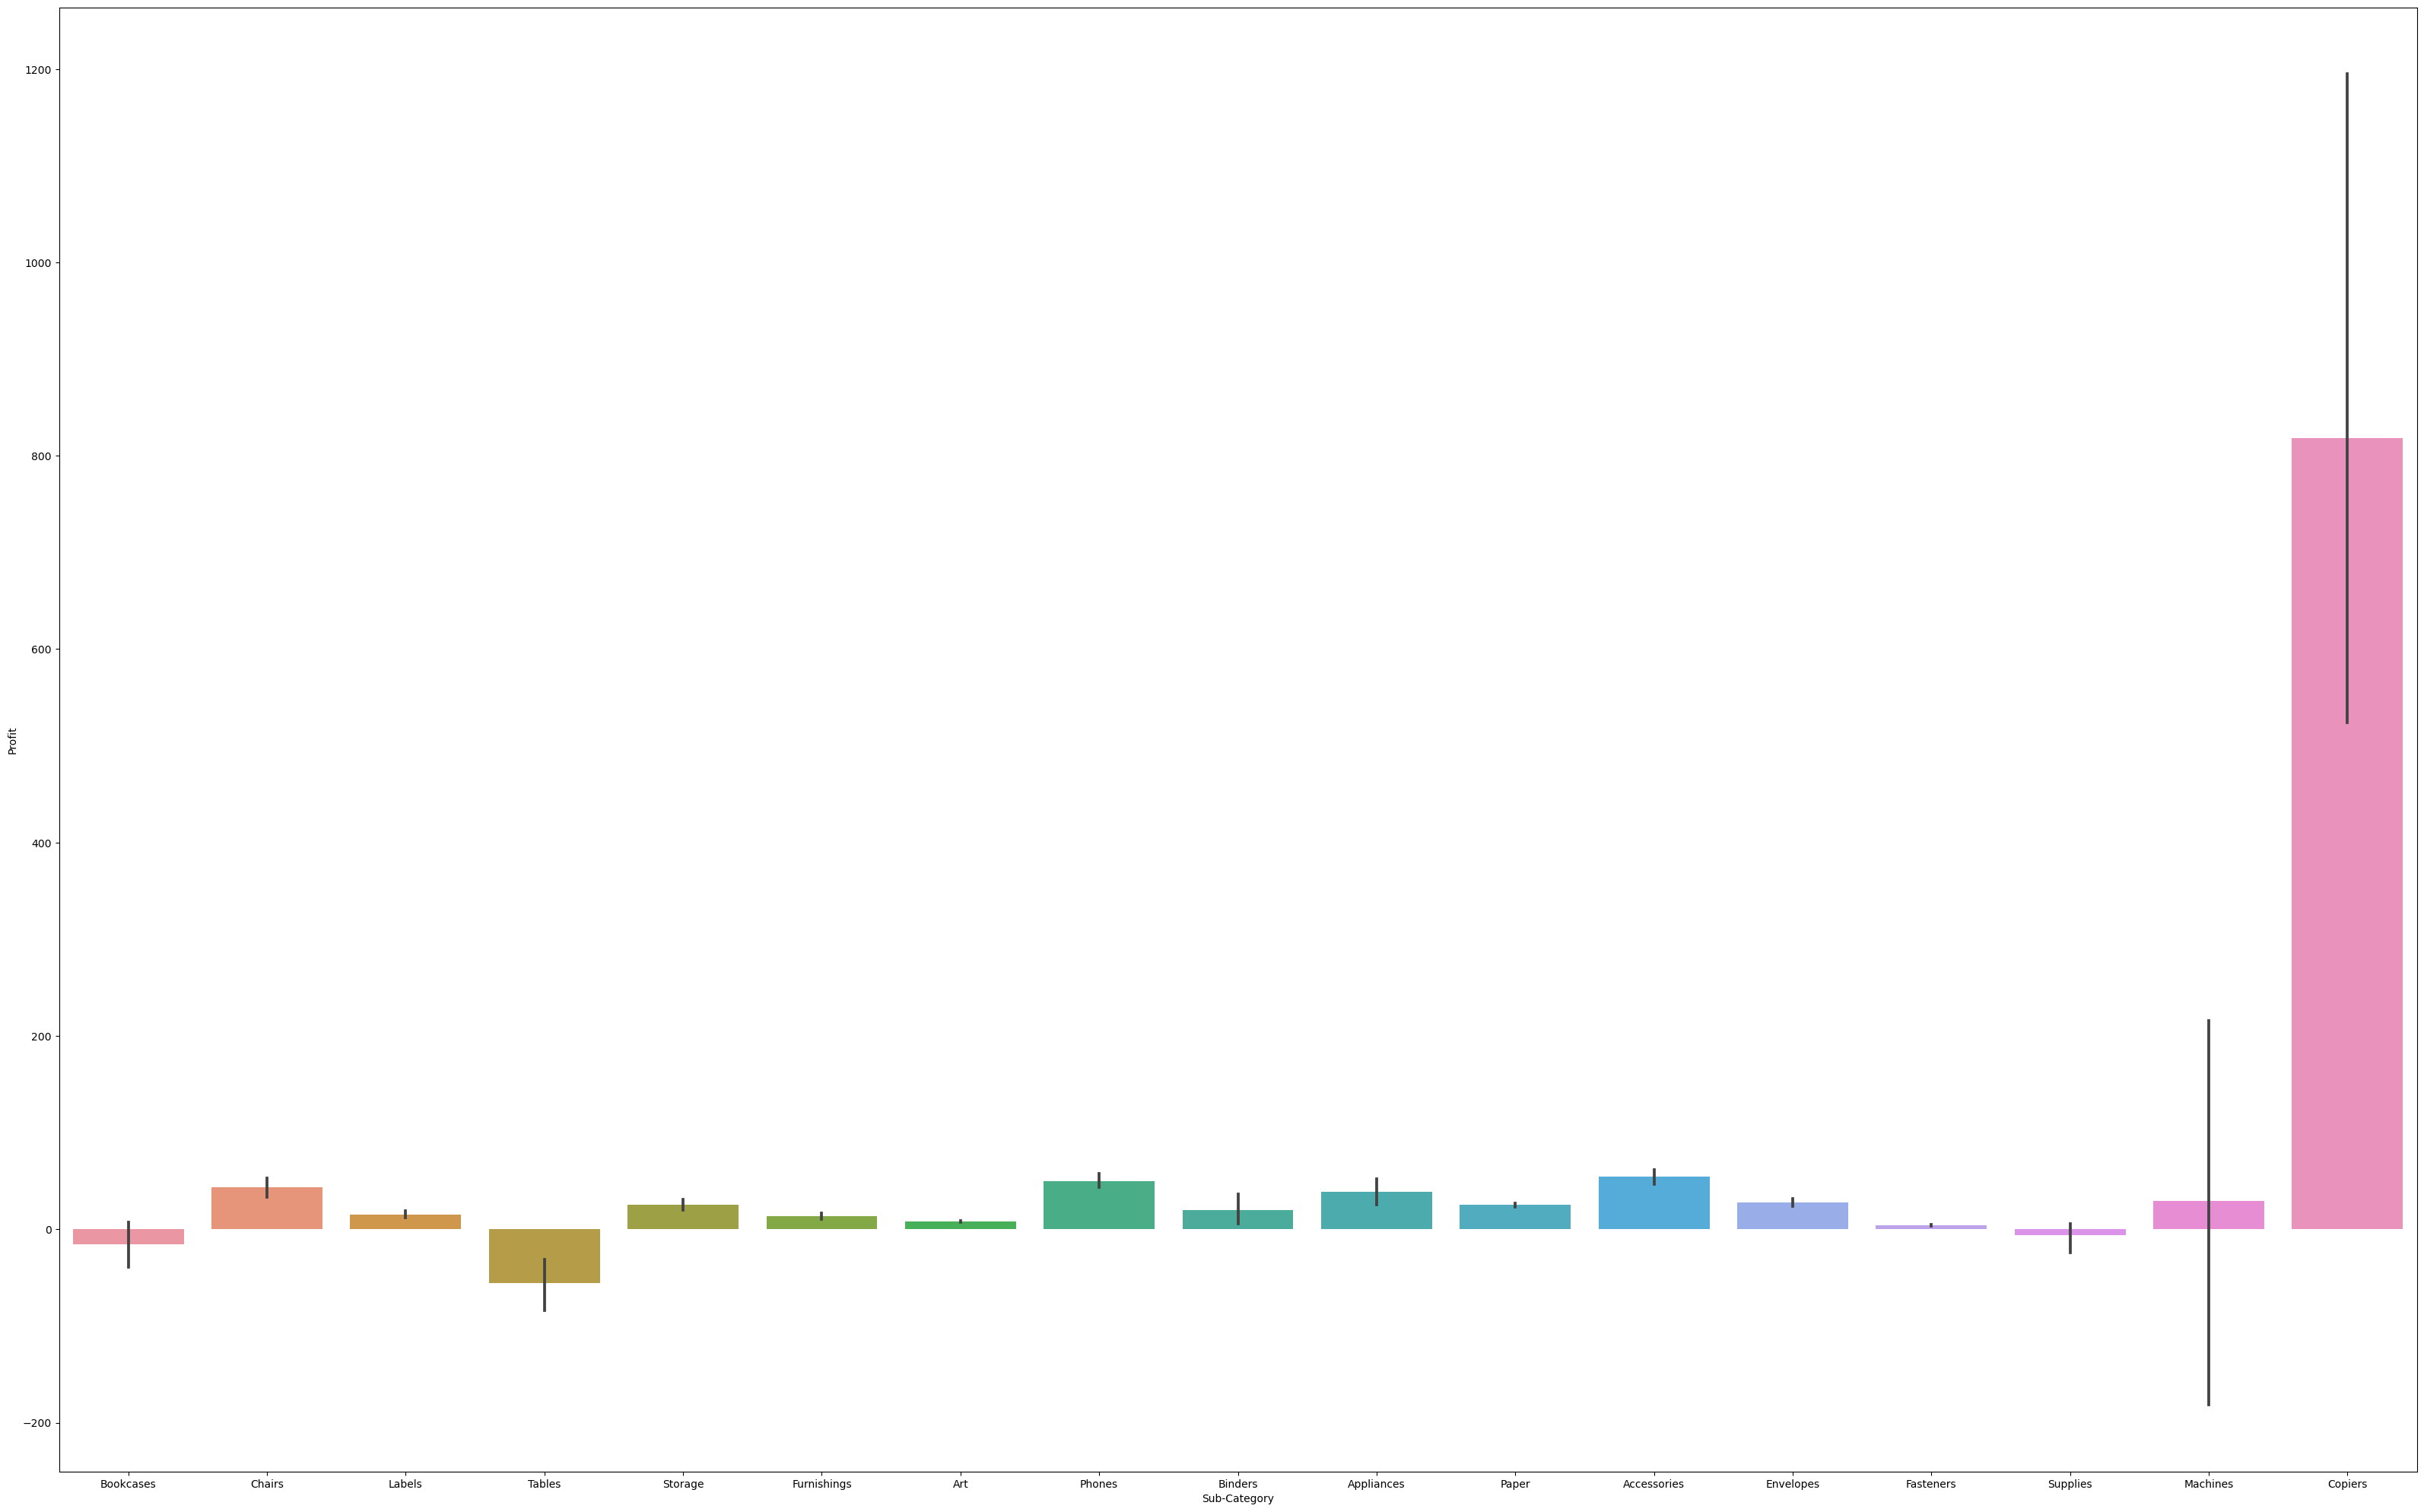

In [35]:
plt.figure(figsize=(40,25))
sns.barplot(x=store['Sub-Category'], y=store['Profit']);

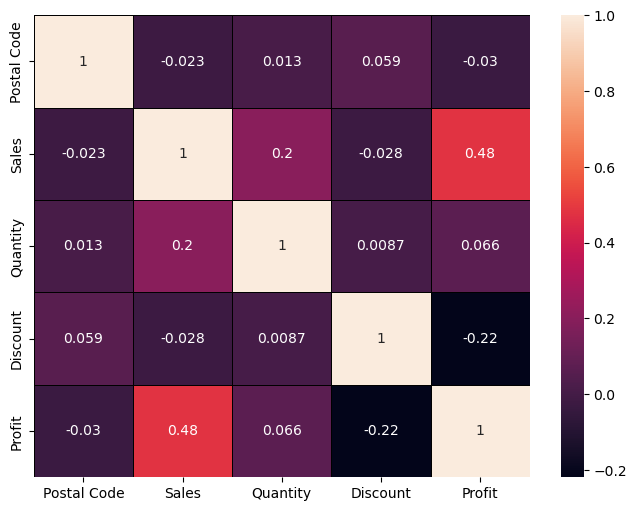

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(store.corr(),annot=True,linewidth=0.5,linecolor="black")
plt.show()

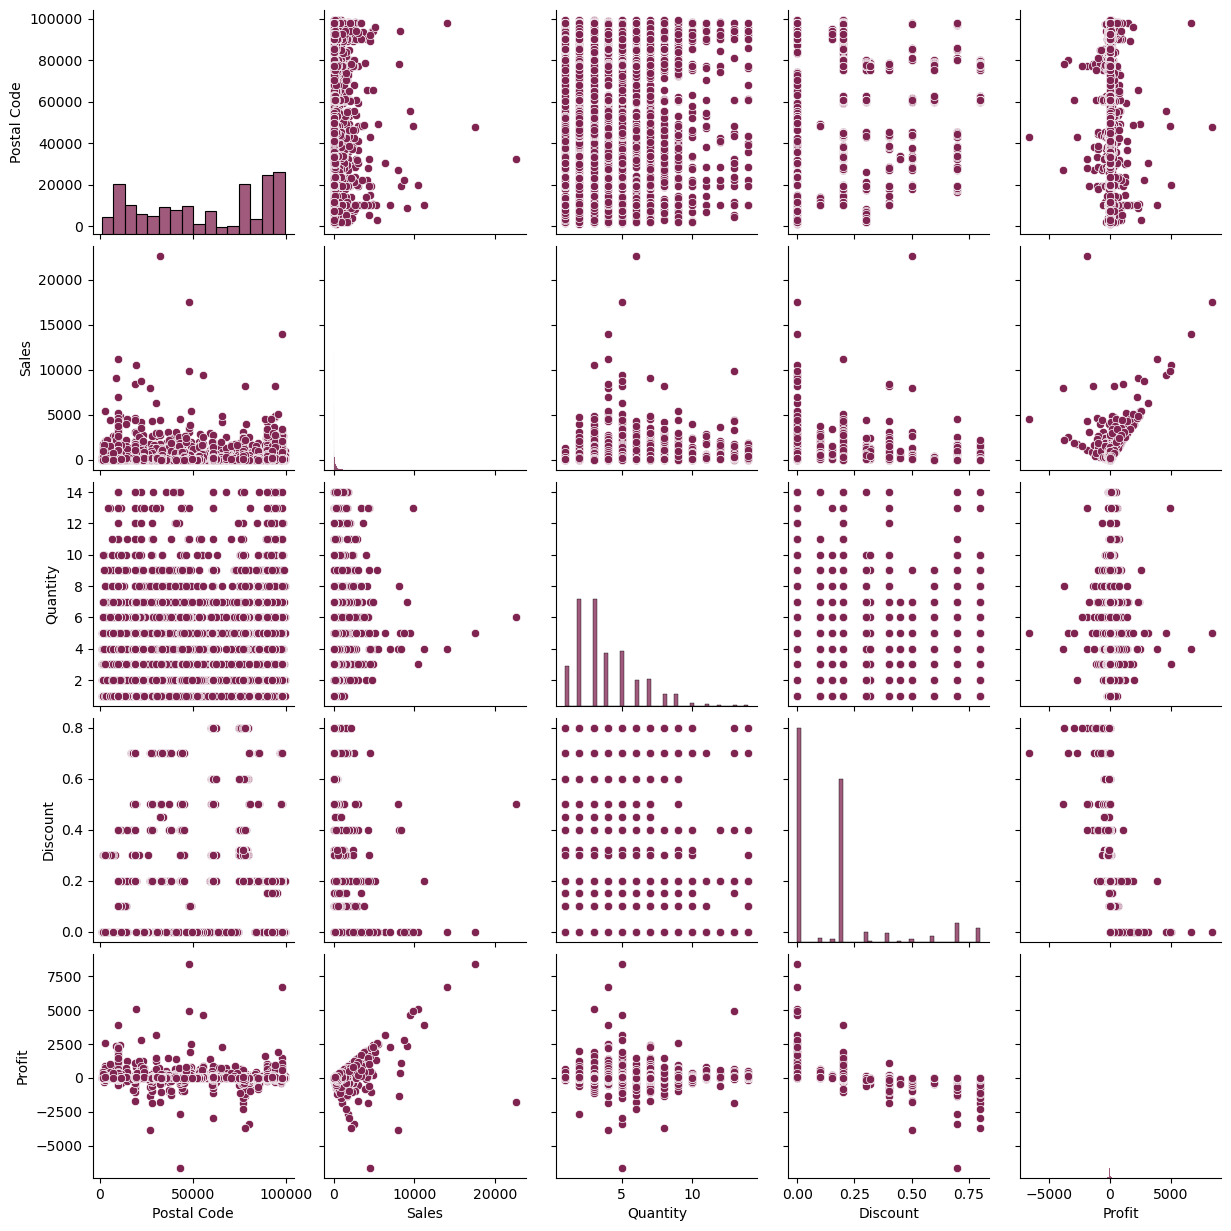

In [37]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(store);

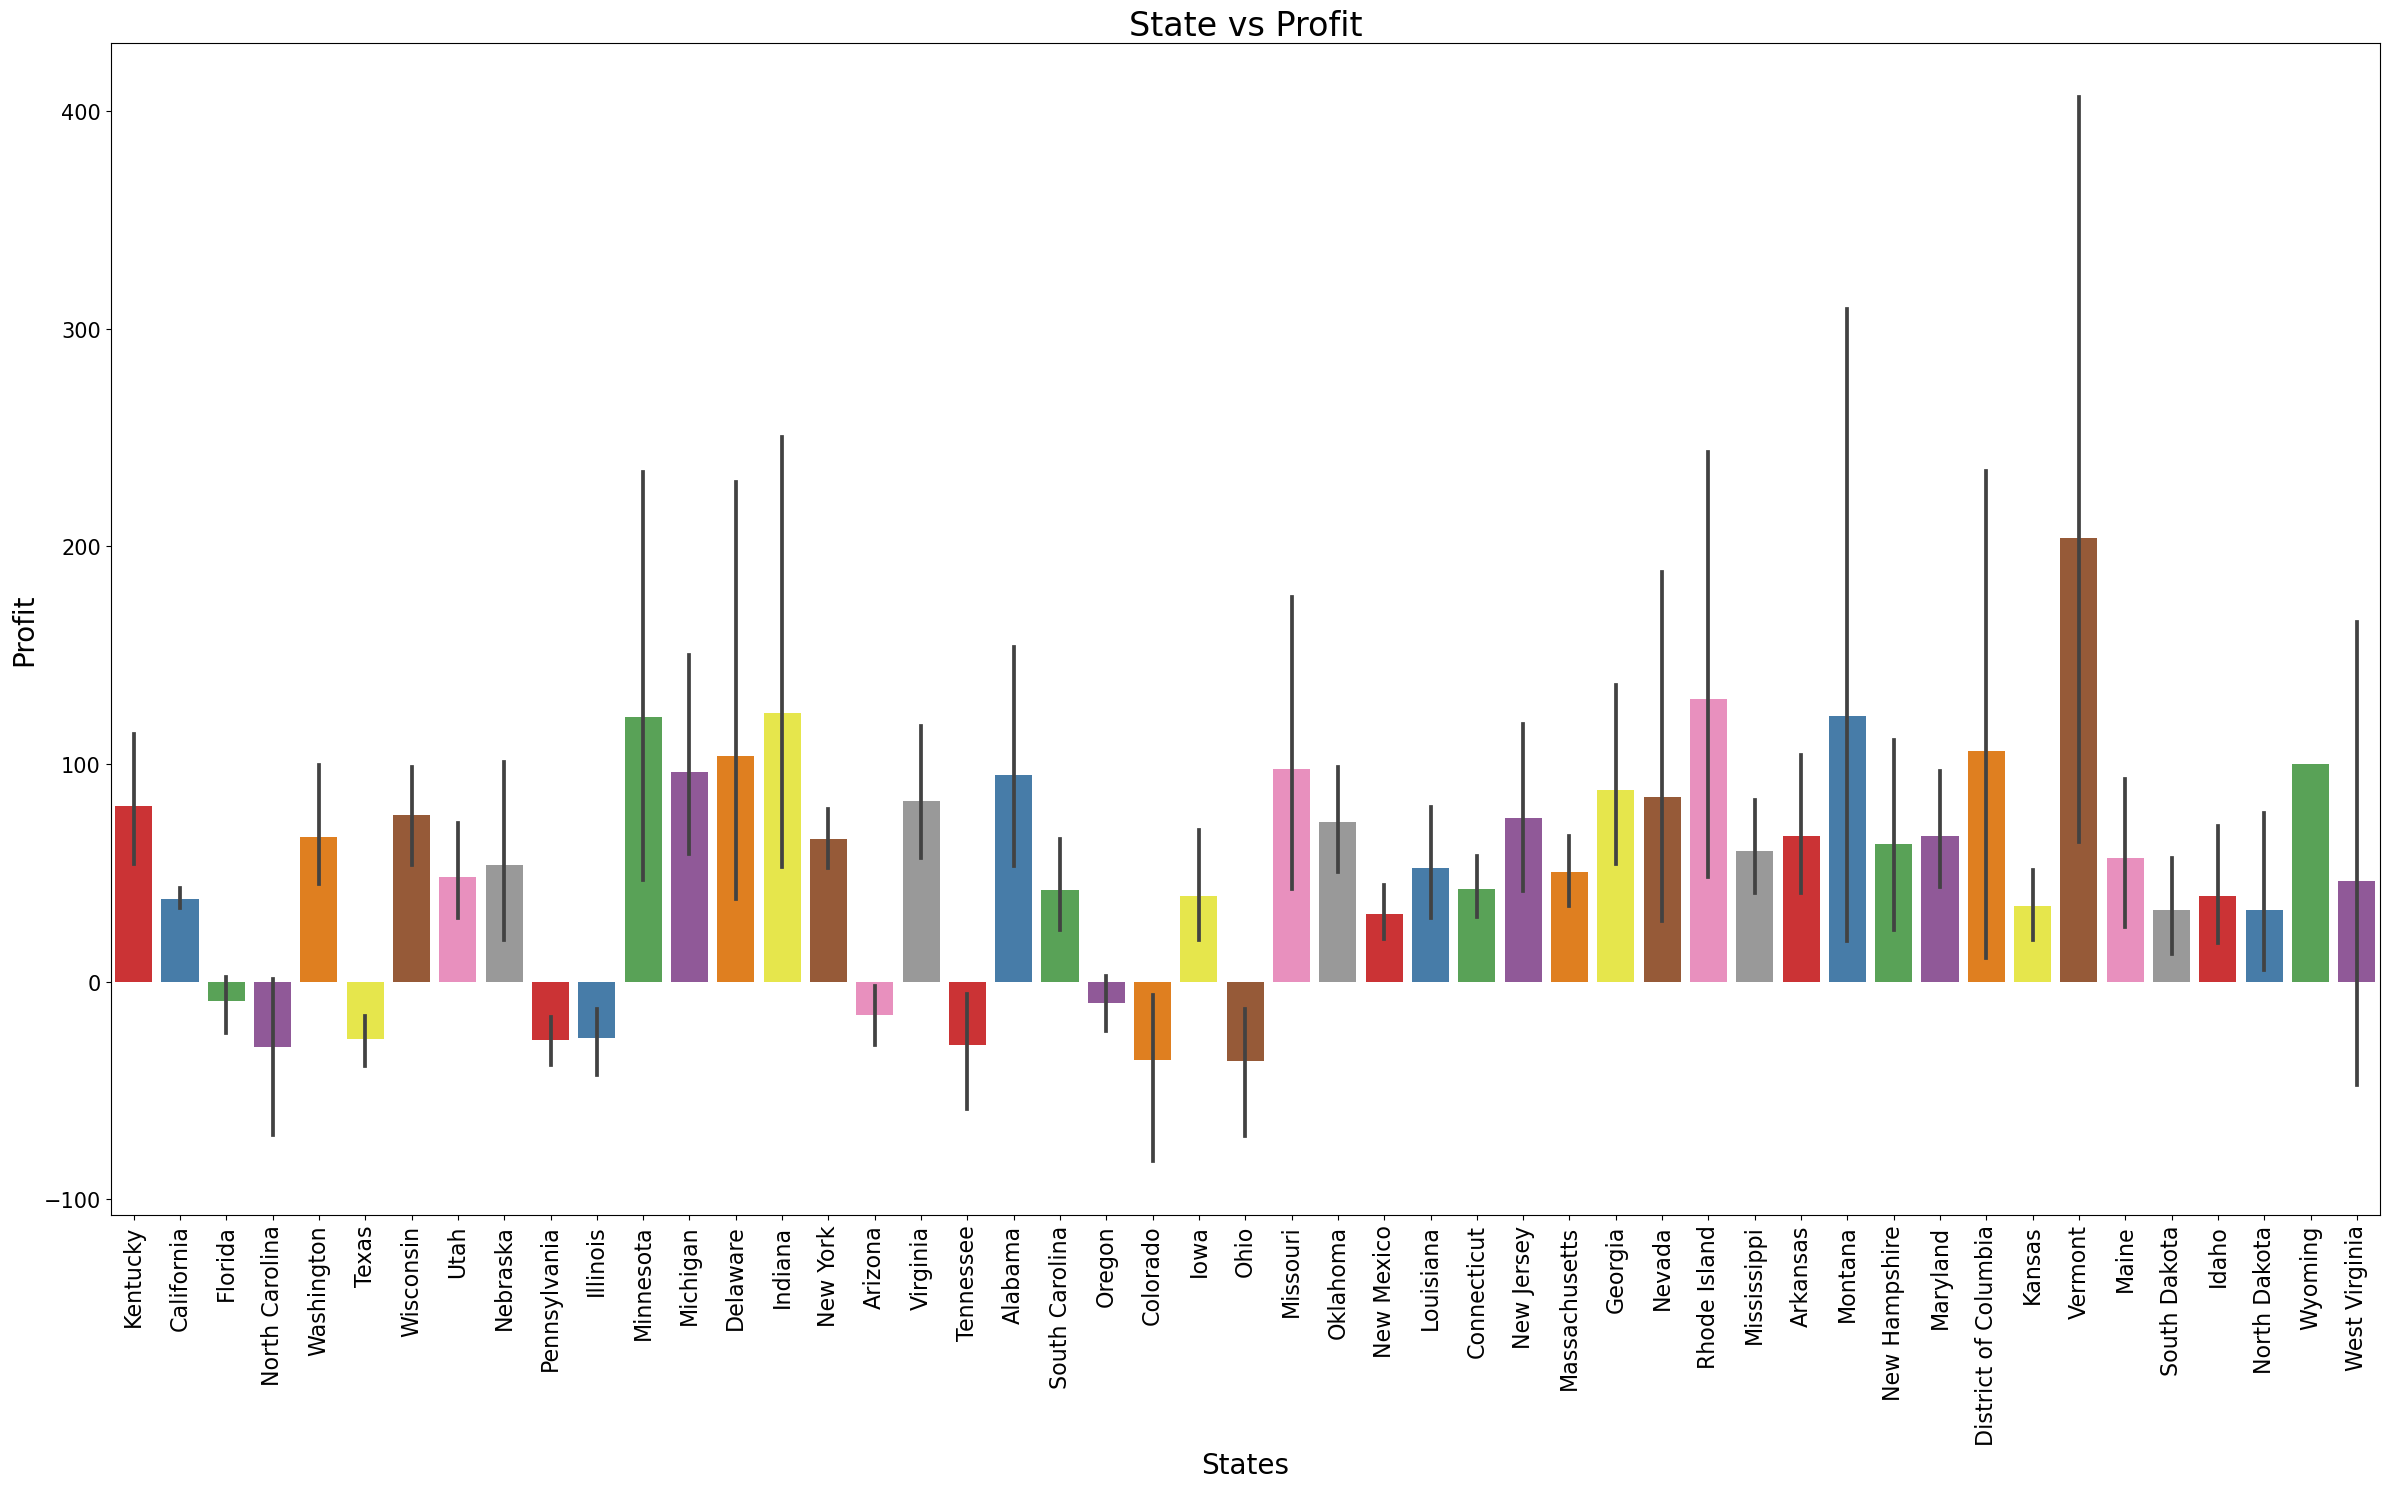

In [38]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x='State', y='Profit',data= store,palette='Set1')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title('State vs Profit',fontsize =24)
plt.xlabel('States',fontsize = 20)
plt.ylabel('Profit',fontsize = 20)
plt.tight_layout()

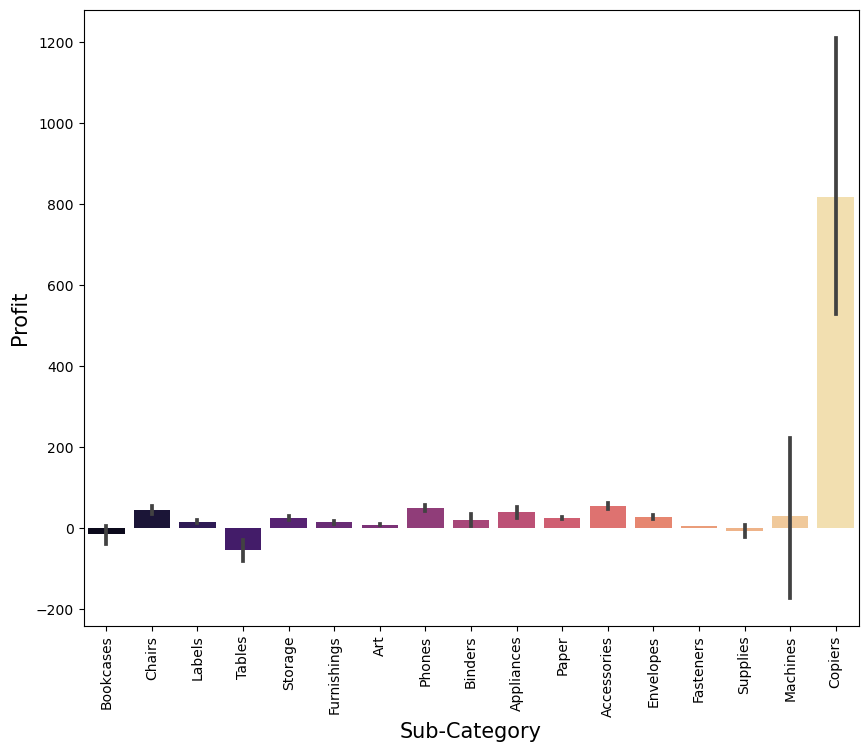

In [39]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x='Sub-Category', y='Profit',data= store,palette='magma')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Profit',fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [40]:
store_tech=store[(store['Category']=='Technology')]

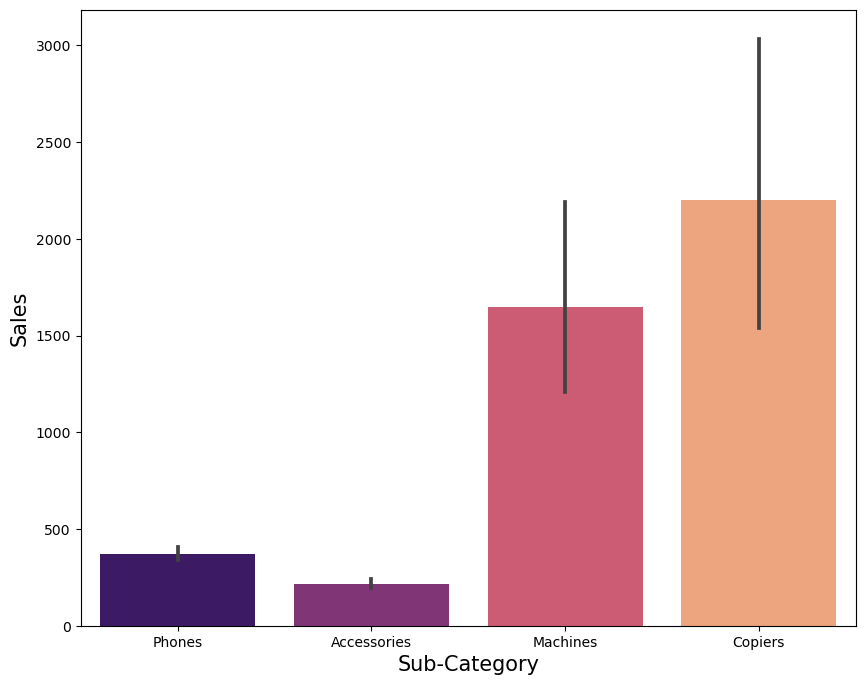

In [41]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x='Sub-Category', y='Sales',data= store_tech,palette='magma')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Sales',fontsize = 15)
plt.show()

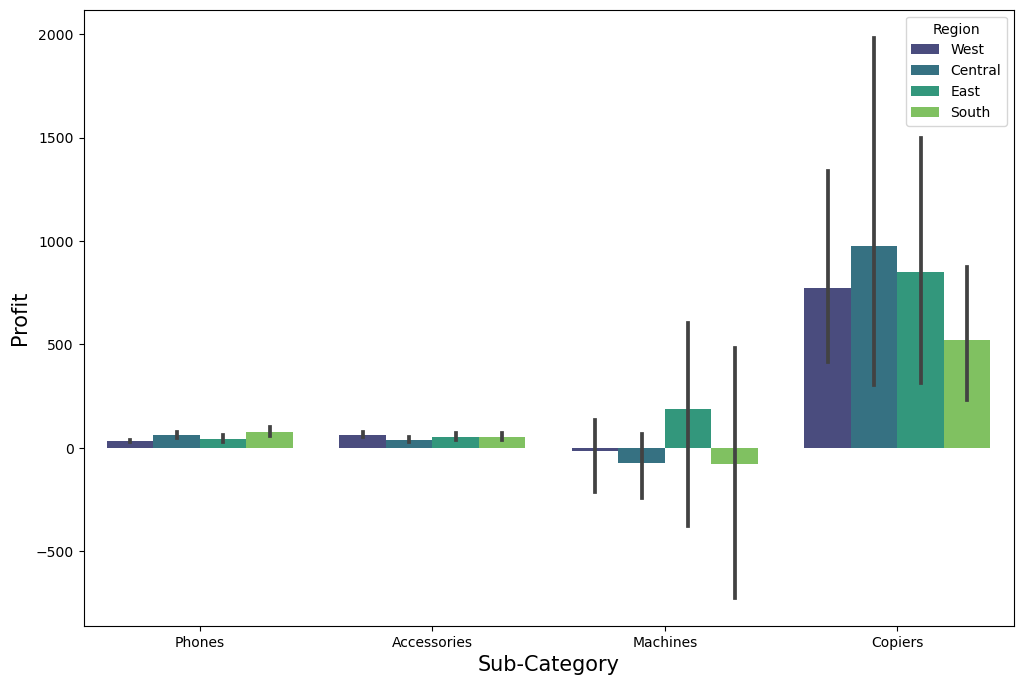

In [42]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x='Sub-Category', y='Profit',hue='Region',data= store_tech,palette='viridis')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Profit',fontsize = 15)
plt.show()

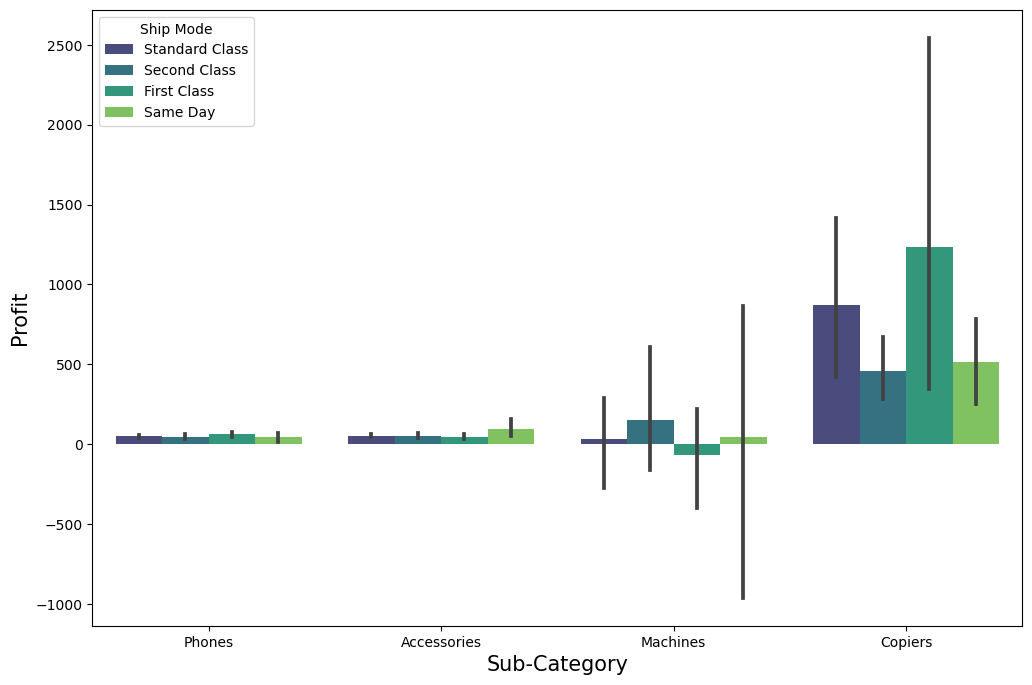

In [43]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x='Sub-Category', y='Profit',hue='Ship Mode',data= store_tech,palette='viridis')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Profit',fontsize = 15)
plt.show()

In [44]:
store.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76330.7891,38.241878,-325.5720,1906.4850,1996,13.33380,97.803399,9565.504848
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


In [45]:
store.fillna(store.mean(),inplace=True)

In [46]:
store.fillna(store.mode().iloc[0],inplace=True)

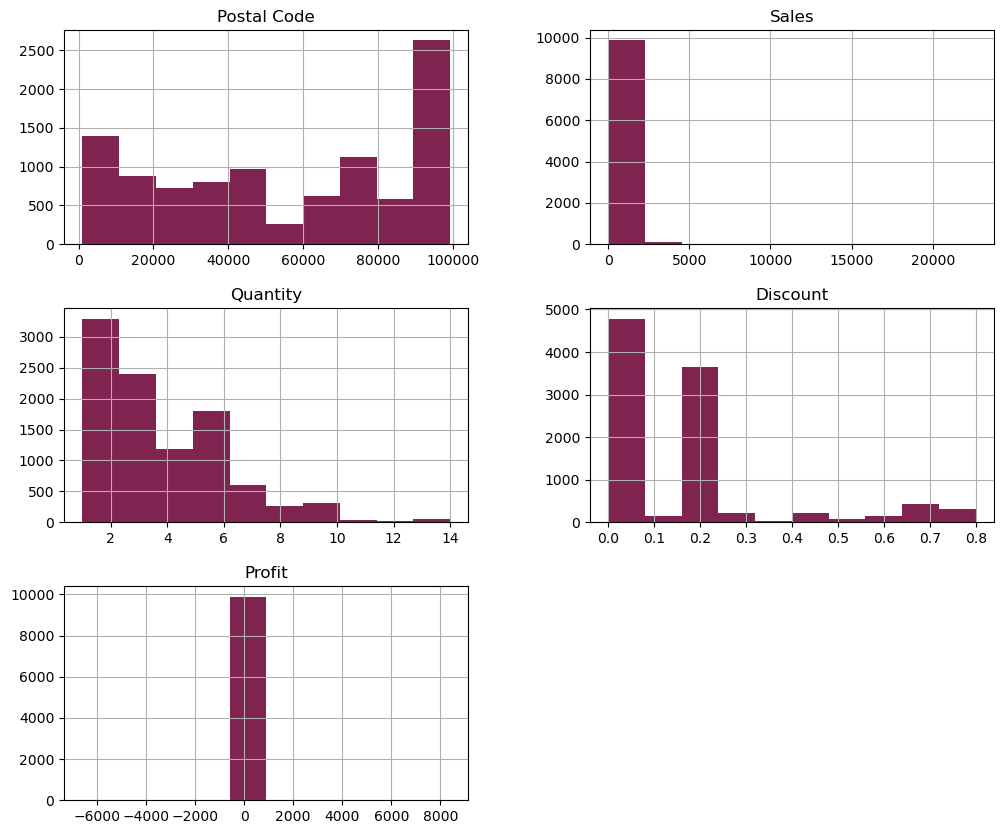

In [47]:
store.hist(figsize=(12,10))
plt.show()

In [48]:
store= store.drop(columns='Postal Code', axis=1)

In [49]:
store.head(4)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310


In [50]:
data1 = store.drop(columns=['Region'])
mean1 = data1.groupby('Category').mean()
mean1.round(2)

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,350.00,3.79,0.17,8.70
Office Supplies,119.55,3.80,0.16,20.35
Technology,452.71,3.76,0.13,78.75


In [51]:
data1 = store.drop(columns=['Category'])
mean1 = data1.groupby('Region').mean()
mean1.round(2)

,Sales,Quantity,Discount,Profit
Region,,,,
Central,215.95,3.78,0.24,17.10
East,238.47,3.73,0.15,32.16
South,241.80,3.83,0.15,28.86
West,227.14,3.83,0.11,33.93


In [52]:
data1 = store.drop(columns=['City'])
mean1 = data1.groupby('State').mean()
mean1.round(2)

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,319.85,4.20,0.00,94.87
Arizona,157.51,3.85,0.30,-15.30
Arkansas,194.64,4.00,0.00,66.81
California,229.25,3.83,0.07,38.24
Colorado,176.42,3.81,0.32,-35.87
Connecticut,163.22,3.43,0.01,42.82
Delaware,285.95,3.82,0.01,103.93
District of Columbia,286.50,4.00,0.00,105.96
Florida,233.61,3.60,0.30,-8.88


In [53]:
data1 = store.drop(columns=['Category'])
mean1 = data1.groupby('Sub-Category').mean()
mean1.round(2)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,215.97,3.84,0.08,54.11
Appliances,230.76,3.71,0.17,38.92
Art,34.10,3.77,0.07,8.21
Binders,133.65,3.92,0.37,19.86
Bookcases,503.86,3.81,0.21,-15.23
Chairs,532.97,3.82,0.17,43.20
Copiers,2198.94,3.44,0.16,817.91
Envelopes,64.87,3.57,0.08,27.42
Fasteners,13.94,4.21,0.08,4.38


In [54]:
store['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [55]:
store['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [56]:
store['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [57]:
store['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

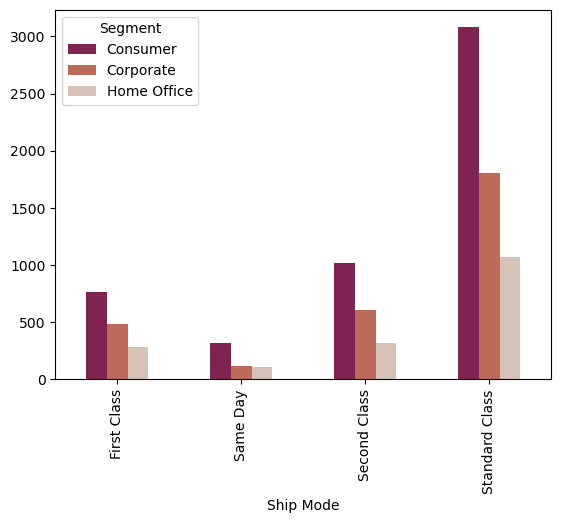

Segment         Consumer  Corporate  Home Office
Ship Mode                                       
First Class          768        485          284
Same Day             317        114          111
Second Class        1019        608          316
Standard Class      3079       1808         1068


In [58]:
def categorical_multi(x,y):
    pd.crosstab(store[x],store[y]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(store[x],store[y]))

categorical_multi(x='Ship Mode',y='Segment')

In [59]:
store['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [60]:
store['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

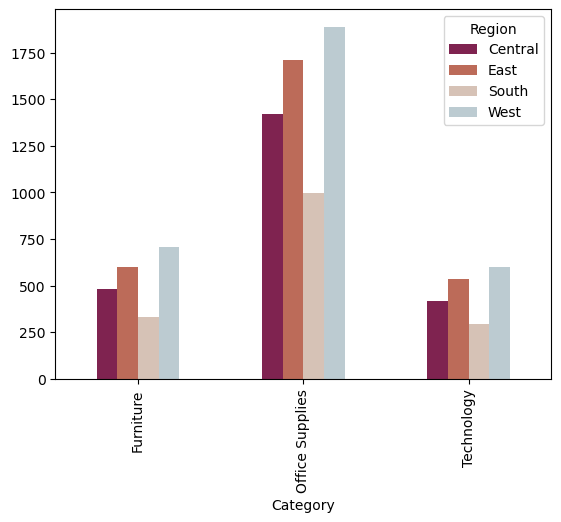

Region           Central  East  South  West
Category                                   
Furniture            480   600    332   706
Office Supplies     1419  1710    995  1888
Technology           420   535    293   599


In [61]:
def categorical_multi(x,y):
    pd.crosstab(store[x],store[y]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(store[x],store[y]))

categorical_multi(x='Category',y='Region')

In [62]:
store.loc[('CV'), :] = store.describe().T['std']/store.describe().T['mean']
store

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960000,2.000000,0.000000,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940000,3.000000,0.000000,219.582000
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620000,2.000000,0.000000,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.577500,5.000000,0.450000,-383.031000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000,2.000000,0.200000,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960000,2.000000,0.000000,15.633200
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576000,2.000000,0.200000,19.393200
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600000,4.000000,0.000000,13.320000
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160000,2.000000,0.000000,72.948000


In [63]:
# Seeing the distribution graphs, it seems some values are really correlated with each other
# Lets check the correlation as well.

In [64]:
store.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200753,-0.028472,0.479067
Quantity,0.200753,1.000000,0.007852,0.066216
Discount,-0.028472,0.007852,1.000000,-0.219362
Profit,0.479067,0.066216,-0.219362,1.000000


High +ve correlation signifies a positive relation; as one quantity increases, it implies an increase in the second quantity. High negative correlation signifies that a decrease in one quantity would lead to increase in another. It is important to decide how we would like to use the correlations, whether positively or negatively as both provide notable results.

In [65]:
corr=store[['Quantity','Profit','Sales','Discount']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

,Quantity,Profit,Sales,Discount
Quantity,1.00000,0.06622,0.20075,0.00785
Profit,0.06622,1.00000,0.47907,-0.21936
Sales,0.20075,0.47907,1.00000,-0.02847
Discount,0.00785,-0.21936,-0.02847,1.00000


**Looking at the table, we see that Discount and Profit have the highest negative correlation, and as a layman also we can deduce that high discounts mean less profit.**

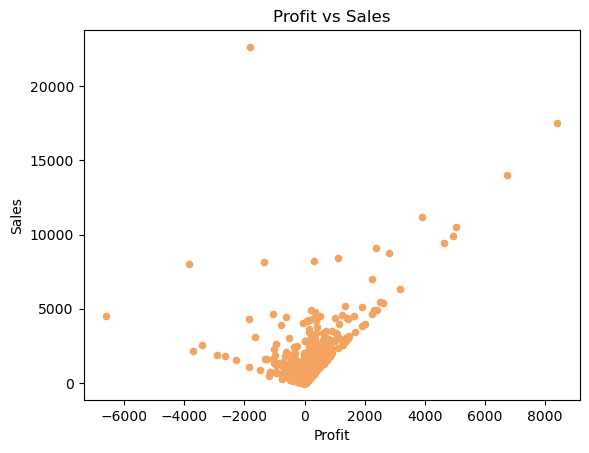

In [66]:
store.plot.scatter(x='Profit',y='Sales',
                  color='sandybrown',title='Profit vs Sales');

**The correlation coefficient for Profit and Selling Price is high and that is also seen on the scatterplot. As Selling Price increases, Profit also is higher.**

**Overall Analysis:**

* The main reason which leads to loss is Discount. Some areas lead to loss due to more discounts and some areas lead to fewer sales due to fewer discounts. It needs to be improved.

* It is better to give more discounts during festival seasons. So that more sales are made.

* The Home office segment needs better improvement.

* Some cities have very less sales. Lack of awareness can be the reason for it. So advertising in those cities will lead to sales.